In [30]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Set style for better visualizations
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

/tmp/ipykernel_1786453/3838050238.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [31]:
# Cell 2: Load the data
features_df = pd.read_csv('./sample data/METABRIC/cleaned_features_final.csv')
label_df = pd.read_csv('./sample data/METABRIC/label.csv')

# Display first few rows of each dataset
print("Features data preview:")
display(features_df.head())
print("\nLabel data preview:")
display(label_df.head())

Features data preview:


,age_at_diagnosis,size,lymph_nodes_positive,stage,lymph_nodes_removed,NPI,grade,grade.1,grade.2,histological,...,int_clust_memb.9,site,site.1,site.2,site.3,site.4,Genefu,Genefu.1,Genefu.2,Genefu.3
0,75.65,22.0,10.0,2.0,16.0,6.04,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,43.19,10.0,0.0,1.0,25.0,4.02,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,48.87,15.0,1.0,2.0,12.0,4.03,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,47.68,25.0,3.0,2.0,21.0,4.05,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,76.97,40.0,8.0,2.0,8.0,6.08,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0



Label data preview:


,event_time,label
0,2999,0
1,1484,0
2,3053,0
3,1721,0
4,1241,1


In [32]:
# Cell 3: Basic statistics
print("Dataset dimensions:")
print(f"Features: {features_df.shape}")
print(f"Labels: {label_df.shape}")

print("\nSurvival statistics:")
print(f"Total patients: {len(label_df)}")
print(f"Deaths: {sum(label_df['label'])}")
print(f"Censored: {len(label_df) - sum(label_df['label'])}")
print(f"Censoring rate: {(len(label_df) - sum(label_df['label'])) / len(label_df) * 100:.1f}%")

Dataset dimensions:
Features: (1981, 79)
Labels: (1981, 2)

Survival statistics:
Total patients: 1981
Deaths: 888
Censored: 1093
Censoring rate: 55.2%


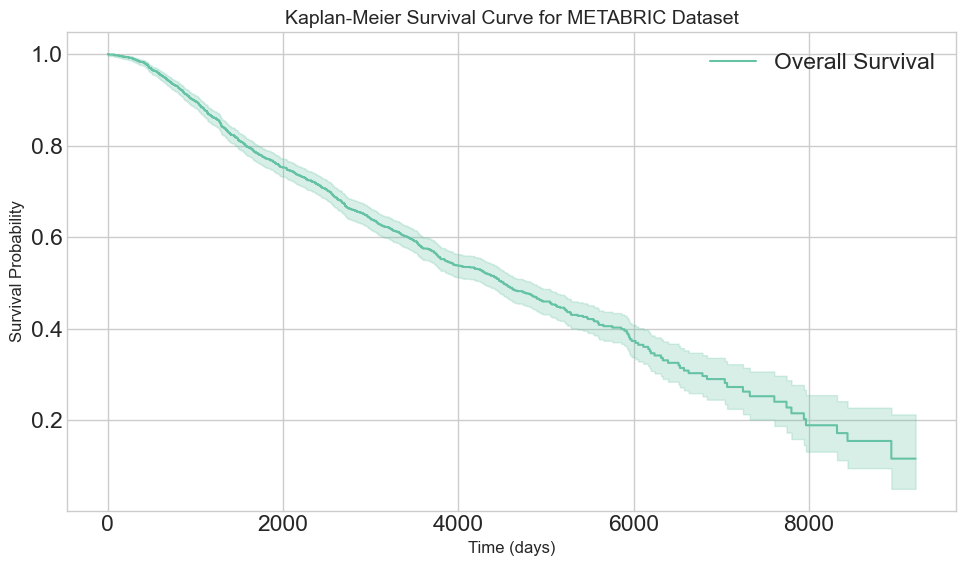

In [33]:
plt.figure(figsize=(10, 6))
kmf = KaplanMeierFitter()
kmf.fit(label_df['event_time'], event_observed=label_df['label'], label='Overall Survival')
kmf.plot()
plt.title('Kaplan-Meier Survival Curve for METABRIC Dataset', fontsize=14)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

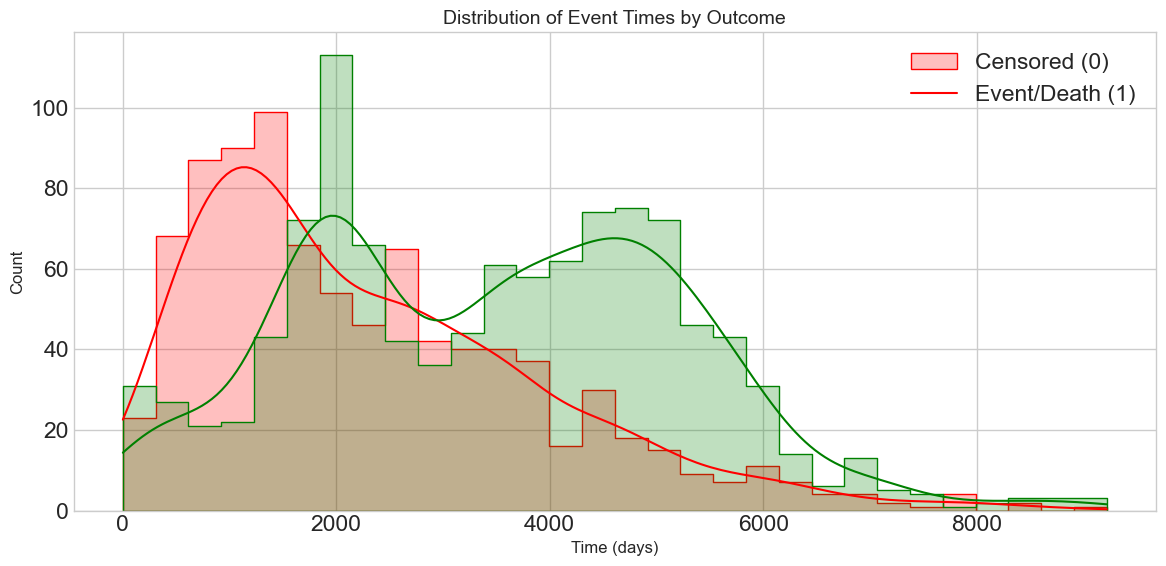

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=label_df, x='event_time', hue='label', bins=30, 
             kde=True, element='step', palette=['green', 'red'])
plt.title('Distribution of Event Times by Outcome', fontsize=14)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Censored (0)', 'Event/Death (1)'])
plt.tight_layout()
plt.show()

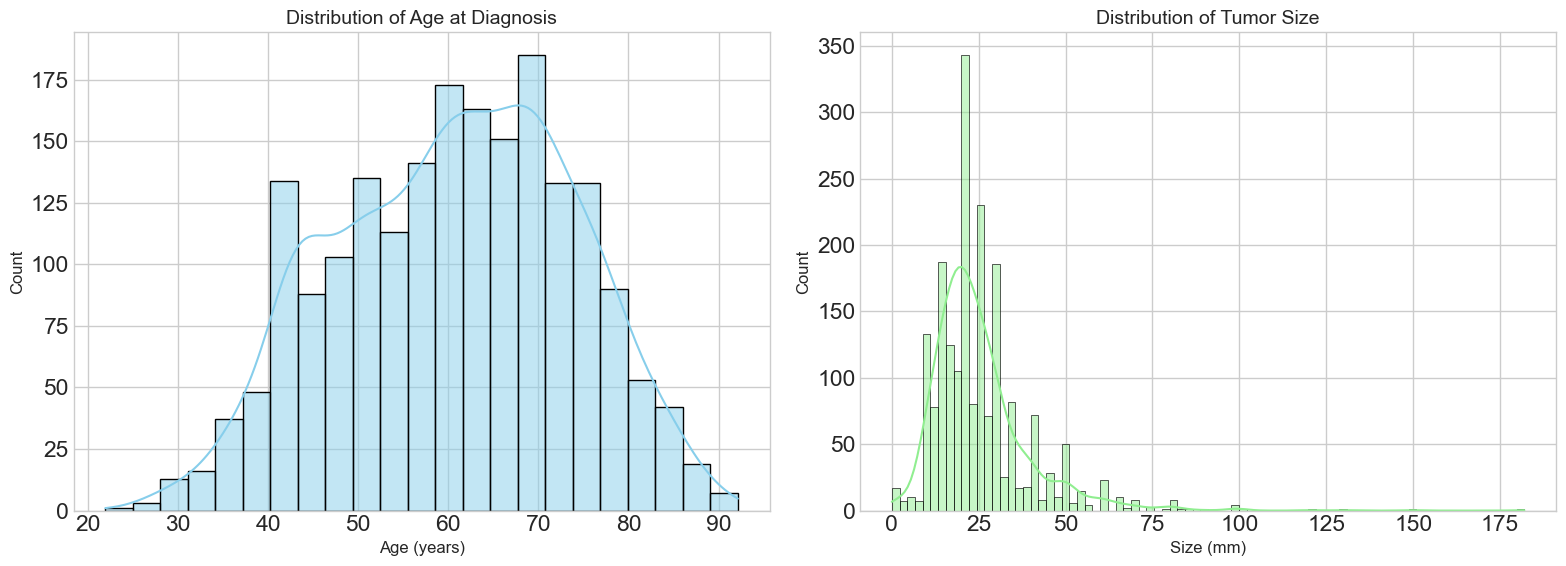

In [35]:
# Assuming age_at_diagnosis and size are in the dataset
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age distribution
sns.histplot(data=features_df, x='age_at_diagnosis', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age at Diagnosis', fontsize=14)
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Tumor size distribution
sns.histplot(data=features_df, x='size', kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Tumor Size', fontsize=14)
axes[1].set_xlabel('Size (mm)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


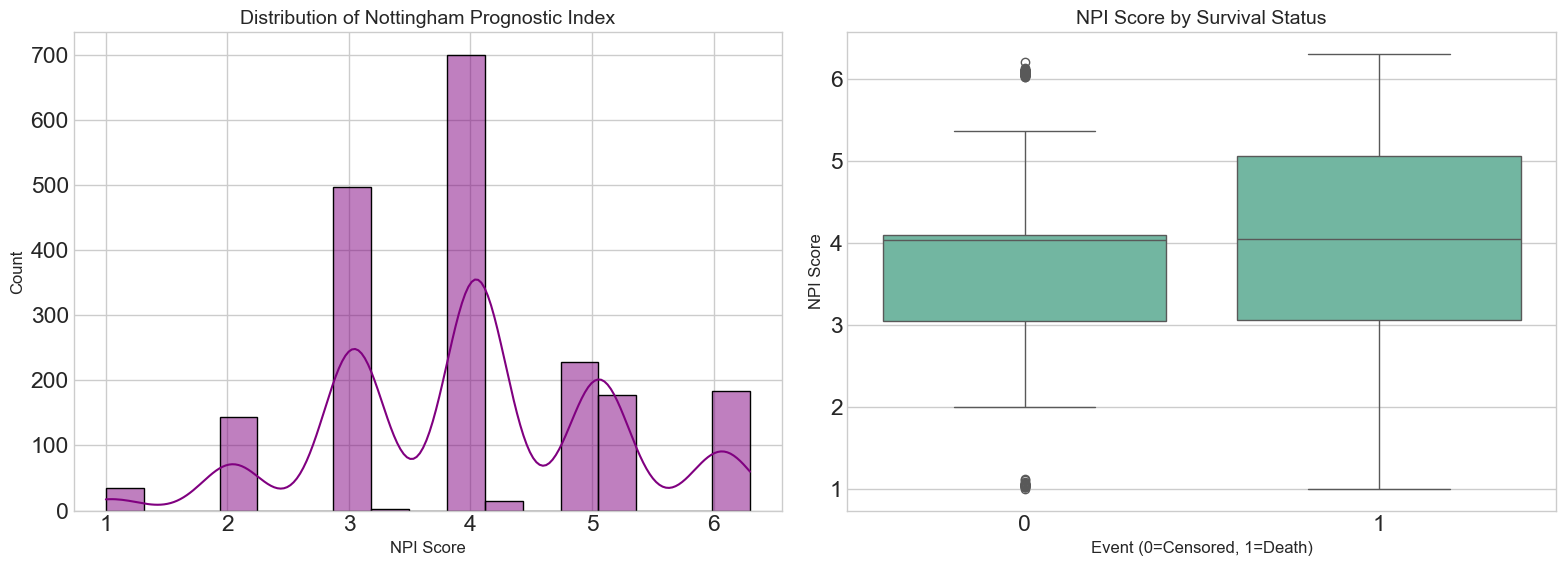

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
combined_df = pd.concat([features_df, label_df], axis=1)

# NPI distribution
sns.histplot(data=features_df, x='NPI', kde=True, ax=axes[0], color='purple')
axes[0].set_title('Distribution of Nottingham Prognostic Index', fontsize=14)
axes[0].set_xlabel('NPI Score', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# NPI by survival status
sns.boxplot(x='label', y='NPI', data=combined_df, ax=axes[1])
axes[1].set_title('NPI Score by Survival Status', fontsize=14)
axes[1].set_xlabel('Event (0=Censored, 1=Death)', fontsize=12)
axes[1].set_ylabel('NPI Score', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1786453/2905002036.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(grade_data.index, rotation=45)
/tmp/ipykernel_1786453/2905002036.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(histological_data.index, rotation=45)


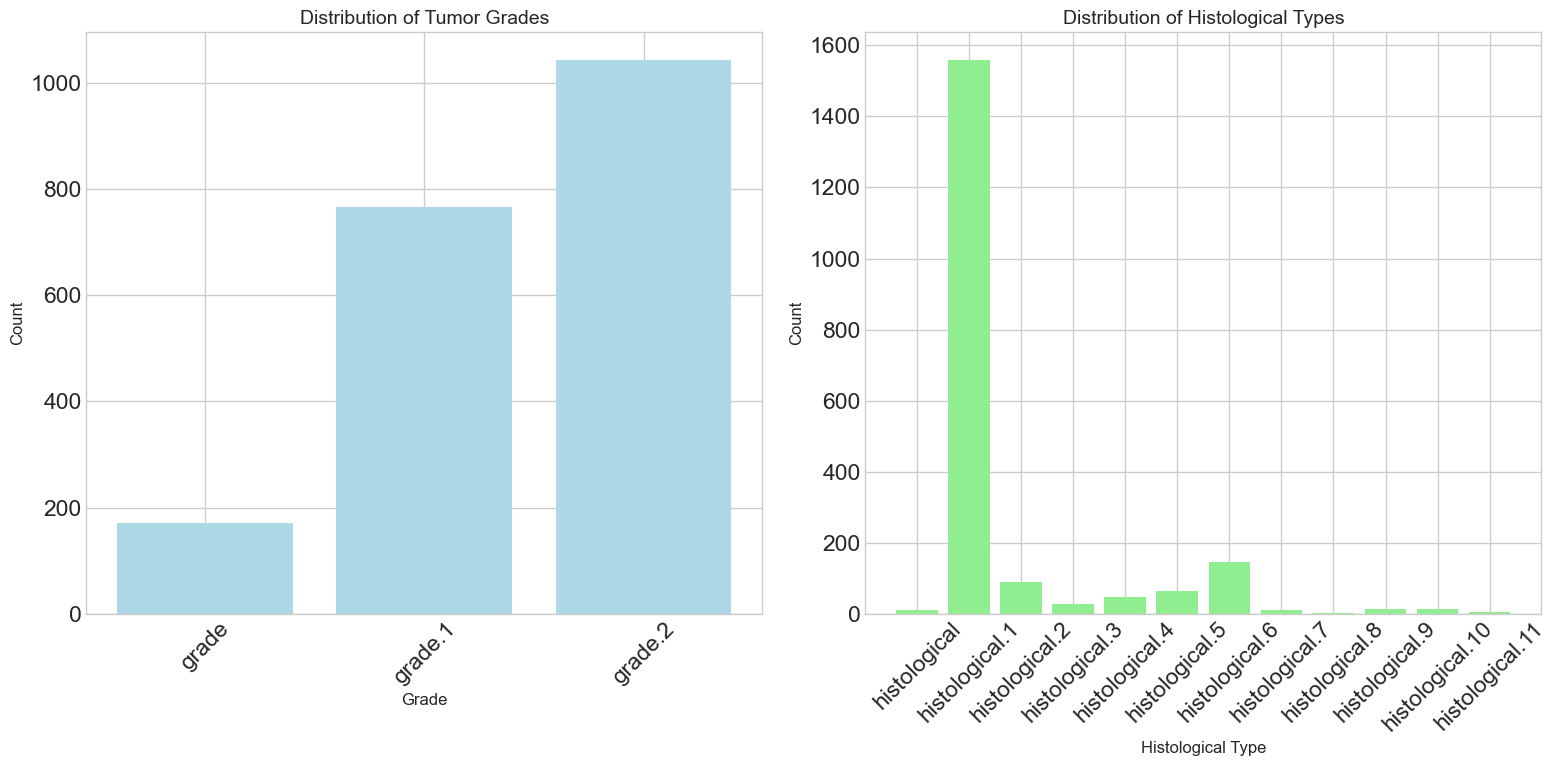

In [37]:
# Extract grade and histological columns
grade_columns = [col for col in features_df.columns if 'grade' in col]
histological_columns = [col for col in features_df.columns if 'histological' in col]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Grade distribution
if grade_columns:
    grade_data = features_df[grade_columns].sum()
    axes[0].bar(grade_data.index, grade_data.values, color='lightblue')
    axes[0].set_title('Distribution of Tumor Grades', fontsize=14)
    axes[0].set_xlabel('Grade', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_xticklabels(grade_data.index, rotation=45)
    axes[0].grid(True, axis='y')

# Histological type distribution
if histological_columns:
    histological_data = features_df[histological_columns].sum()
    axes[1].bar(histological_data.index, histological_data.values, color='lightgreen')
    axes[1].set_title('Distribution of Histological Types', fontsize=14)
    axes[1].set_xlabel('Histological Type', fontsize=12)
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].set_xticklabels(histological_data.index, rotation=45)
    axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

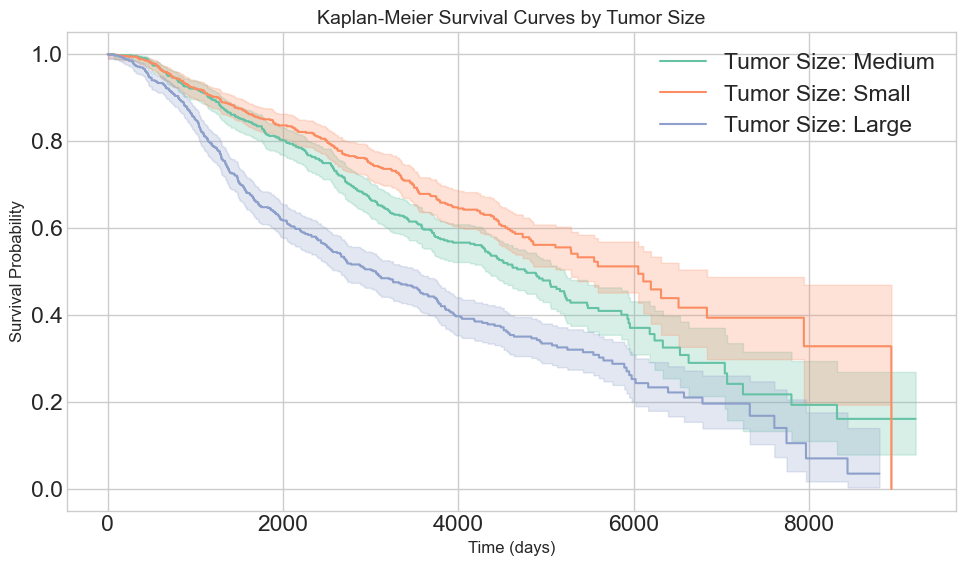

In [38]:
combined_df['size_group'] = pd.qcut(combined_df['size'], 3, labels=['Small', 'Medium', 'Large'])

plt.figure(figsize=(10, 6))
for size_group in combined_df['size_group'].unique():
    subset = combined_df[combined_df['size_group'] == size_group]
    kmf = KaplanMeierFitter()
    kmf.fit(subset['event_time'], event_observed=subset['label'], label=f'Tumor Size: {size_group}')
    kmf.plot()

plt.title('Kaplan-Meier Survival Curves by Tumor Size', fontsize=14)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

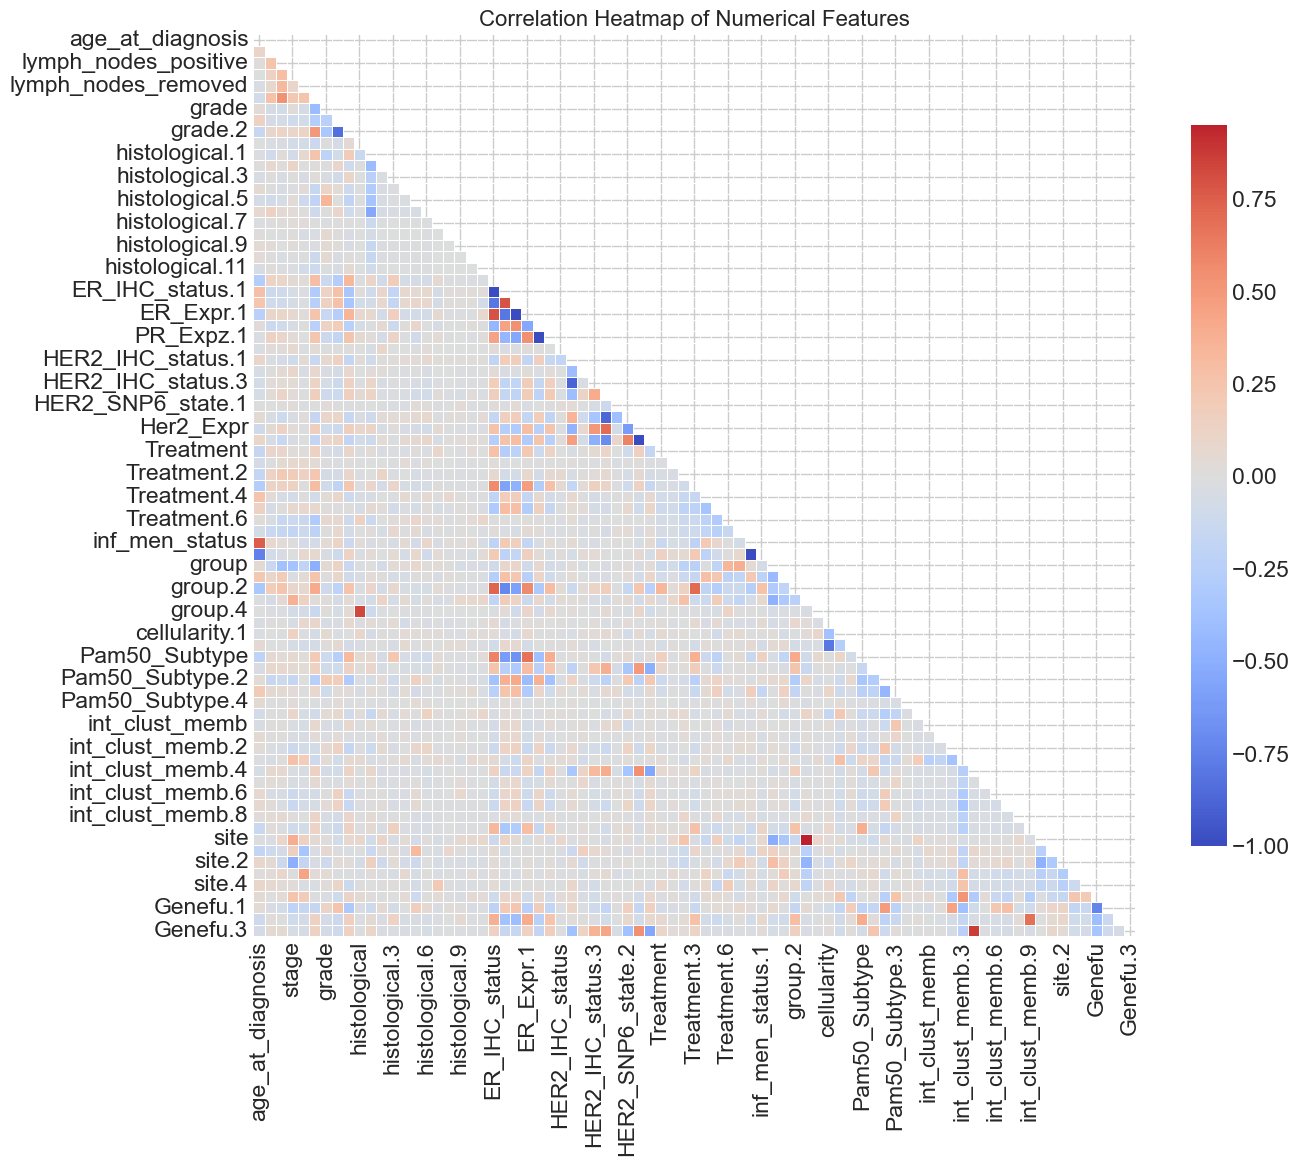

In [39]:
plt.figure(figsize=(14, 12))
numerical_features = features_df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_features.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=False, cmap='coolwarm', 
            center=0, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

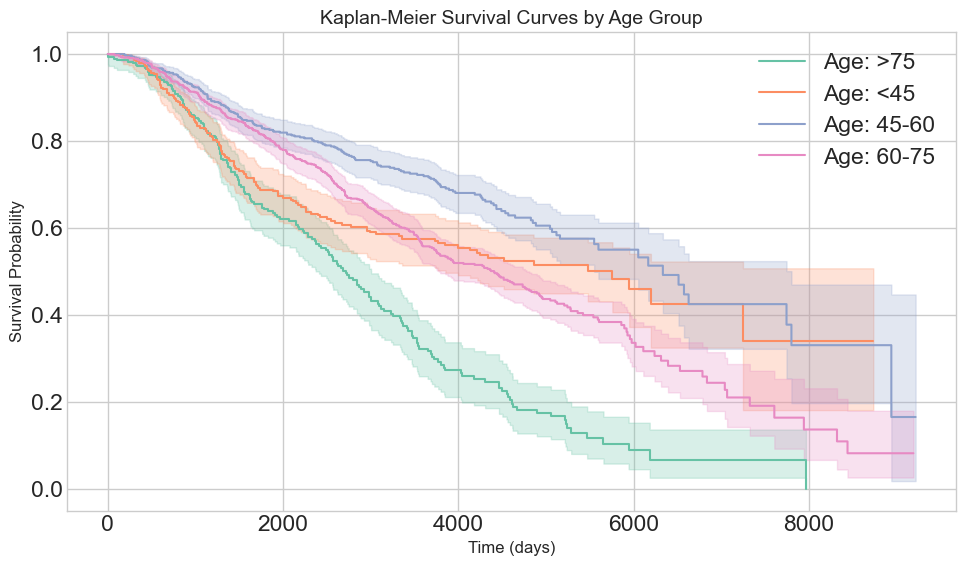

In [40]:
# Create age groups
combined_df['age_group'] = pd.cut(combined_df['age_at_diagnosis'], 
                                 bins=[0, 45, 60, 75, 100], 
                                 labels=['<45', '45-60', '60-75', '>75'])

plt.figure(figsize=(10, 6))
for age_group in combined_df['age_group'].unique():
    subset = combined_df[combined_df['age_group'] == age_group]
    kmf = KaplanMeierFitter()
    kmf.fit(subset['event_time'], event_observed=subset['label'], label=f'Age: {age_group}')
    kmf.plot()

plt.title('Kaplan-Meier Survival Curves by Age Group', fontsize=14)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

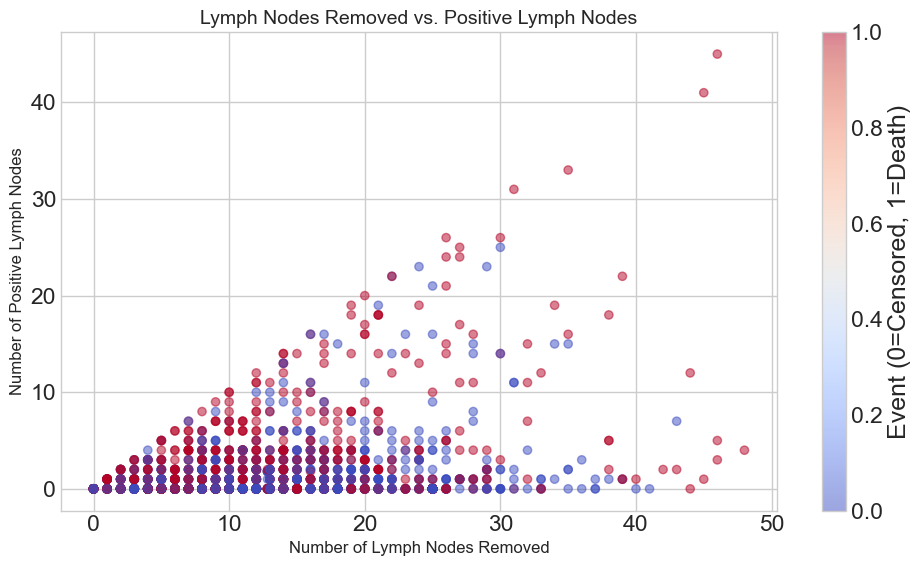

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['lymph_nodes_removed'], combined_df['lymph_nodes_positive'], 
            alpha=0.5, c=combined_df['label'], cmap='coolwarm')
plt.colorbar(label='Event (0=Censored, 1=Death)')
plt.title('Lymph Nodes Removed vs. Positive Lymph Nodes', fontsize=14)
plt.xlabel('Number of Lymph Nodes Removed', fontsize=12)
plt.ylabel('Number of Positive Lymph Nodes', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

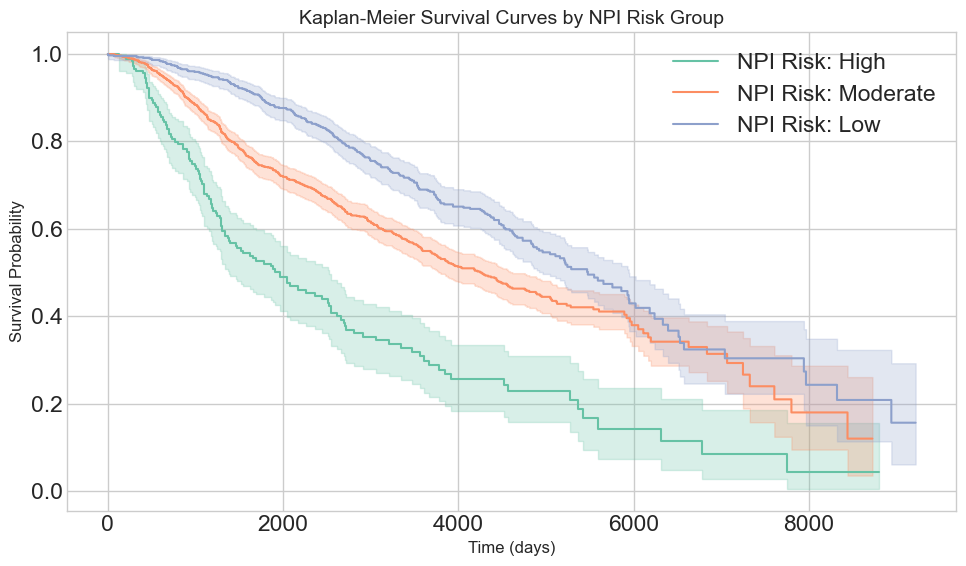

In [42]:
combined_df['NPI_risk'] = pd.cut(combined_df['NPI'], 
                                bins=[0, 3.4, 5.4, 10], 
                                labels=['Low', 'Moderate', 'High'])

plt.figure(figsize=(10, 6))
for risk_group in combined_df['NPI_risk'].unique():
    subset = combined_df[combined_df['NPI_risk'] == risk_group]
    kmf = KaplanMeierFitter()
    kmf.fit(subset['event_time'], event_observed=subset['label'], label=f'NPI Risk: {risk_group}')
    kmf.plot()

plt.title('Kaplan-Meier Survival Curves by NPI Risk Group', fontsize=14)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
# Create a summary table of key features by outcome
summary_stats = combined_df.groupby('label')[['age_at_diagnosis', 'size', 'lymph_nodes_positive', 
                                             'lymph_nodes_removed', 'NPI']].agg(['mean', 'median', 'std'])
display(summary_stats)

# Test for statistical significance
from scipy import stats

print("Statistical significance tests between survival groups:")
for feature in ['age_at_diagnosis', 'size', 'lymph_nodes_positive', 'lymph_nodes_removed', 'NPI']:
    stat, pval = stats.ttest_ind(
        combined_df[combined_df['label']==0][feature],
        combined_df[combined_df['label']==1][feature],
        equal_var=False
    )
    print(f"{feature}: t-stat={stat:.3f}, p-value={pval:.6f}")

age_at_diagnosis                          size                   \
                  mean  median        std       mean median       std   
label                                                                   
0            58.345627  58.720  12.094527  23.404868   20.0  13.19953   
1            63.469966  65.495  13.729128  27.836345   25.0  15.34113   

      lymph_nodes_positive                  lymph_nodes_removed         \
                      mean median       std                mean median   
label                                                                    
0                 1.241922    0.0  2.761586           12.518736   11.0   
1                 2.502727    1.0  4.765136           13.212405   12.0   

                      NPI                   
            std      mean median       std  
label                                       
0      8.111066  3.823065   4.03  1.076662  
1      8.400444  4.199245   4.05  1.172755

Statistical significance tests between survival groups:
age_at_diagnosis: t-stat=-8.710, p-value=0.000000
size: t-stat=-6.802, p-value=0.000000
lymph_nodes_positive: t-stat=-6.989, p-value=0.000000
lymph_nodes_removed: t-stat=-1.856, p-value=0.063587
NPI: t-stat=-7.364, p-value=0.000000
